In [185]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt

In [186]:
#true values 
true_val = np.arange(1,6)/6.0


In [187]:
def TD( state_val, alpha):
    
    #start from C
    state = 3
    while True:
        #terminal states 
        if state == 0 or state == 6:
            break
        
        action = np.random.binomial(1, 0.5)
        if action == 0:
            action = -1
            
        new_state = state + action
        
        #rewards
        if new_state == 6:
            reward = 1
        else:
            reward = 0 
        
        #update
        state_val[state] += alpha * (reward + state_val[new_state] - state_val[state])
        
        state = new_state
    return state_val

In [188]:
def MC(state_val, alpha):
    
    #start from C
    state = 3
    traj = []
    traj.append(state)
    while True:
        action = np.random.binomial(1, 0.5)
        if action == 0:
            action = -1
            
        new_state = state + action
        
        state = new_state
        traj.append(state)
        if state == 0:
            returns = 0
            break
        elif state == 6:
            returns = 1
            break
    for i in traj[:-1]:
        state_val[i] += alpha * (returns - state_val[i])

    return state_val

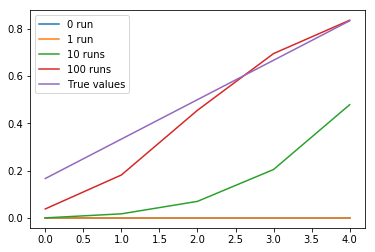

In [190]:


val_1 = np.zeros(7) #
val_10 = np.zeros(7) #
val_0 = np.zeros(7) #
val_100 = np.zeros(7) #

for i in range(1):
    val_0 = TD(val_0, 0.1)
    

for i in range(1):
    val_1 = TD(val_1, 0.1)
    
for i in range(10):
    val_10 = TD(val_10, 0.1)
    
for i in range(100):
    val_100 = TD(val_100, 0.1)
    
plt.plot(val_0[1:6] , label = "0 run")
plt.plot(val_1[1:6], label = "1 run")
plt.plot(val_10[1:6], label = "10 runs")
plt.plot(val_100[1:6], label = "100 runs")
plt.plot(true_val, label = "True values")
plt.legend()

In [191]:
def rmse(true, compare):
    return sqrt(mean_squared_error(true, compare))

In [192]:
mse_05 = []
state_values = np.zeros(7)
state_values[1:6] += 0.5
for i in range(100):
    state_values = TD(state_values, 0.05)
    mse_val = rmse(true_val, state_values[1:6])
    #print(mse_val)
    mse_05.append(mse_val)

In [193]:
mse_15 = []
state_values = np.zeros(7)
state_values[1:6] += 0.5
for i in range(100):
    state_values = TD(state_values, 0.15)
    mse_val = rmse(true_val, state_values[1:6])
    #print(mse_val)
    mse_15.append(mse_val)

In [194]:
mse_1 = []
state_values = np.zeros(7)
state_values[1:6] += 0.5
for i in range(100):
    state_values = TD(state_values, 0.1)
    mse_val = rmse(true_val, state_values[1:6])
    #print(mse_val)
    mse_1.append(mse_val)

In [195]:
mc_1_avg = np.zeros(100)
for k in range(100):
    mse_mc1 = []
    state_values = np.zeros(7)
    state_values[1:6] += 0.5
    for i in range(100):
        state_values = MC(state_values, 0.01)
        mse_val = rmse(true_val, state_values[1:6])
        #print(mse_val)
        mse_mc1.append(mse_val)
    mse_mc1 = np.array(mse_mc1)
    mc_1_avg = np.add(mc_1_avg, mse_mc1)

In [196]:
mc_2_avg = np.zeros(100)
for k in range(100):
    mse_mc1 = []
    state_values = np.zeros(7)
    state_values[1:6] += 0.5
    for i in range(100):
        state_values = MC(state_values, 0.02)
        mse_val = rmse(true_val, state_values[1:6])
        #print(mse_val)
        mse_mc1.append(mse_val)
    mse_mc1 = np.array(mse_mc1)
    mc_2_avg = np.add(mc_2_avg, mse_mc1)

In [197]:
mc_3_avg = np.zeros(100)
for k in range(100):
    mse_mc1 = []
    state_values = np.zeros(7)
    state_values[1:6] += 0.5
    for i in range(100):
        state_values = MC(state_values, 0.03)
        mse_val = rmse(true_val, state_values[1:6])
        #print(mse_val)
        mse_mc1.append(mse_val)
    mse_mc1 = np.array(mse_mc1)
    mc_3_avg = np.add(mc_3_avg, mse_mc1)

In [198]:
mc_4_avg = np.zeros(100)
for k in range(100):
    mse_mc1 = []
    state_values = np.zeros(7)
    state_values[1:6] += 0.5
    for i in range(100):
        state_values = MC(state_values, 0.04)
        mse_val = rmse(true_val, state_values[1:6])
        #print(mse_val)
        mse_mc1.append(mse_val)
    mse_mc1 = np.array(mse_mc1)
    mc_4_avg = np.add(mc_4_avg, mse_mc1)

In [199]:
mc_1_avg = mc_1_avg/100
mc_2_avg = mc_2_avg/100
mc_3_avg = mc_3_avg/100
mc_4_avg = mc_4_avg/100

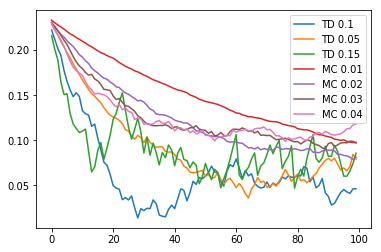

In [200]:
plt.plot(mse_1 , label = "TD 0.1")
plt.plot(mse_05, label = "TD 0.05")
plt.plot(mse_15, label = "TD 0.15")
plt.plot(mc_1_avg, label = "MC 0.01")
plt.plot(mc_2_avg, label = "MC 0.02")
plt.plot(mc_3_avg, label = "MC 0.03")
plt.plot(mc_4_avg, label = "MC 0.04")
plt.legend()